## Importing necessary libraries for data reading, cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading data from csv and storing in variable df

In [6]:
df = pd.read_csv("bank-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Seperating numeric and categorical column names

In [7]:
num_cols = df.columns[df.dtypes != 'O']
cat_cols = df.columns[df.dtypes == 'O']
num_cols, cat_cols

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object'))

## Checking for null values

In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Insight: This dataset contains no null value.

## Checking for duplicate values

In [9]:
df.duplicated().sum()

0

Insight: No duplicate value is there in this dataset.

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Insight:

This record contains 45211 non-null, non-duplicated entries.

Average balance in customer's account is 448 euros.

Average interaction with customers is around 3 min.

Customers need not to be contacted ever unless there is some issue occured.

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Text(1.0, 1.0, 'Personal loan vs Housing loan')

<Figure size 1000x600 with 0 Axes>

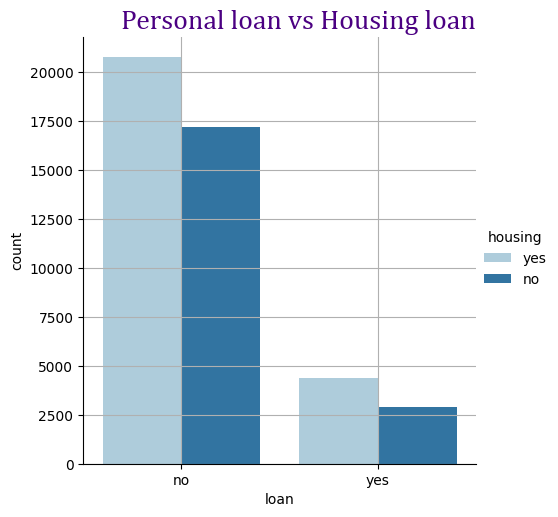

In [22]:
plt.figure(figsize=(10,6))
sns.catplot(df, x='loan', hue='housing', kind='count', palette='Paired')
plt.grid(zorder=2)
plt.title('Personal loan vs Housing loan', loc= 'right', color='indigo', font='cambria', fontsize= 20)

Insight: 

More than 20000 customers have taken housing loan only.

Almost 17500 customers neither have taken housing loan, nor personal loan.

Nearly 5000 customers are there who has availed both housing and personal loans.

Around 2500 customers are there who has taken personal loan only.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

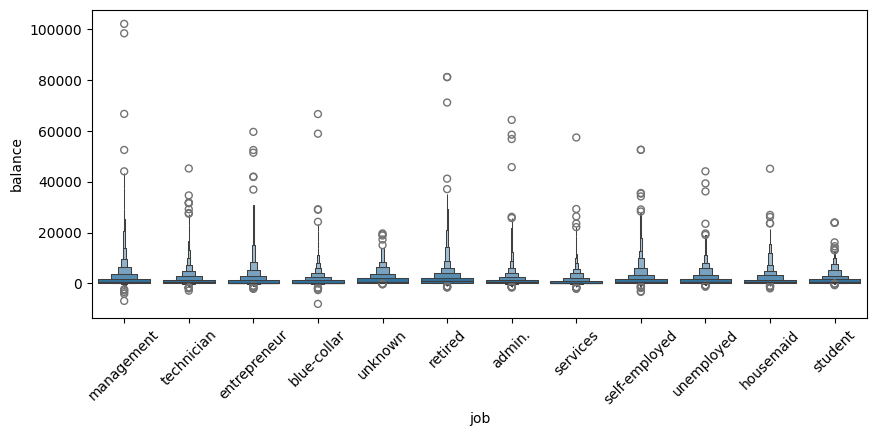

In [57]:
plt.figure(figsize=(10,4))
sns.boxenplot(df, x='job', y='balance')
plt.xticks(rotation = 45)

Insight: This data contains lots of outliers as well as negative balance holders.

In [40]:
negative_balance = df[df['balance']<0]

In [42]:
negative_balance.count()

age          3766
job          3766
marital      3766
education    3766
default      3766
balance      3766
housing      3766
loan         3766
contact      3766
day          3766
month        3766
duration     3766
campaign     3766
pdays        3766
previous     3766
poutcome     3766
y            3766
dtype: int64

Insight: 3766 customers are there who are running with negative balance.

In [43]:
negative_balance[(negative_balance['housing'] == 'yes') & (negative_balance['loan'] == 'yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
54,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,unknown,no
112,56,self-employed,married,primary,no,-34,yes,yes,unknown,5,may,212,2,-1,0,unknown,no
127,34,services,married,secondary,no,-16,yes,yes,unknown,5,may,78,1,-1,0,unknown,no
239,49,blue-collar,divorced,primary,no,-9,yes,yes,unknown,5,may,389,1,-1,0,unknown,no
281,41,admin.,married,secondary,no,-62,yes,yes,unknown,5,may,55,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39314,47,admin.,married,secondary,no,-121,yes,yes,cellular,18,may,167,4,314,4,failure,no
39319,32,technician,single,secondary,no,-472,yes,yes,cellular,18,may,121,2,-1,0,unknown,no
39347,24,services,single,secondary,yes,-1414,yes,yes,cellular,18,may,171,2,-1,0,unknown,no
39528,40,blue-collar,married,primary,no,-310,yes,yes,cellular,26,may,133,2,363,5,failure,no


Insight: 754 customers are there who are having negative balance and availed both housing and personal loans.

In [44]:
negative_balance[negative_balance['default'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
338,51,admin.,single,secondary,yes,-2,no,no,unknown,5,may,402,3,-1,0,unknown,no
458,33,blue-collar,single,secondary,yes,-60,no,no,unknown,6,may,243,1,-1,0,unknown,no
572,41,blue-collar,single,primary,yes,-137,yes,yes,unknown,6,may,189,1,-1,0,unknown,no
636,52,blue-collar,divorced,primary,yes,-183,yes,no,unknown,6,may,145,1,-1,0,unknown,no
838,35,blue-collar,single,unknown,yes,-532,yes,no,unknown,7,may,149,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38876,26,management,single,tertiary,yes,-130,yes,no,cellular,18,may,216,1,-1,0,unknown,no
38985,38,entrepreneur,single,tertiary,yes,-38,yes,no,cellular,18,may,119,4,-1,0,unknown,no
39347,24,services,single,secondary,yes,-1414,yes,yes,cellular,18,may,171,2,-1,0,unknown,no
39674,58,retired,married,primary,yes,-235,no,yes,telephone,27,may,93,2,-1,0,unknown,no


Insight: 440 customers are there with negative balance who has credit card by default.

In [51]:
negative_balance[negative_balance['pdays'] == -1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44541,28,management,single,tertiary,no,-62,no,no,unknown,12,aug,17,1,-1,0,unknown,no
44566,34,services,married,secondary,no,-52,no,no,unknown,13,aug,12,1,-1,0,unknown,no
44578,36,entrepreneur,married,secondary,no,-280,no,no,unknown,17,aug,6,1,-1,0,unknown,no
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no


Insight: 3278 customers are there with negative balance who were never contacted.

<Axes: xlabel='pdays', ylabel='Count'>

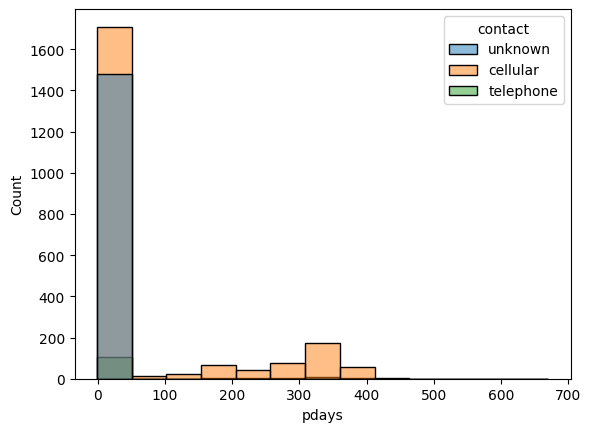

In [50]:
sns.histplot(negative_balance, x='pdays', hue='contact')

Insight: Most of the negative balance holders were contacted using cellular medium.

In [58]:
for i in cat_cols:
    print(f"Unique values for {i} column= {df[i].unique()}")

Unique values for job column= ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values for marital column= ['married' 'single' 'divorced']
Unique values for education column= ['tertiary' 'secondary' 'unknown' 'primary']
Unique values for default column= ['no' 'yes']
Unique values for housing column= ['yes' 'no']
Unique values for loan column= ['no' 'yes']
Unique values for contact column= ['unknown' 'cellular' 'telephone']
Unique values for month column= ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values for poutcome column= ['unknown' 'failure' 'other' 'success']
Unique values for y column= ['no' 'yes']


## Encoding of Categorical Columns

In [67]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#### Making copy of main data to make necessary changes

In [68]:
df1 = df.copy()

In [69]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Removing unnecessary columns

In [70]:
df1.drop(columns=['age', 'job', 'marital', 'education', 'day', 'month', 'previous'], inplace=True)
df1.head()

,default,balance,housing,loan,contact,duration,campaign,pdays,poutcome,y
0,no,2143,yes,no,unknown,261,1,-1,unknown,no
1,no,29,yes,no,unknown,151,1,-1,unknown,no
2,no,2,yes,yes,unknown,76,1,-1,unknown,no
3,no,1506,yes,no,unknown,92,1,-1,unknown,no
4,no,1,no,no,unknown,198,1,-1,unknown,no


#### Seperating num cols and cat cols

In [71]:
num_cols1 = df1.columns[df1.dtypes != 'O']
cat_cols1 = df1.columns[df1.dtypes == 'O']
num_cols1, cat_cols1

(Index(['balance', 'duration', 'campaign', 'pdays'], dtype='object'),
 Index(['default', 'housing', 'loan', 'contact', 'poutcome', 'y'], dtype='object'))

#### Performing lebel encoding to cat cols

In [72]:
for i in cat_cols:
    df1[i] = encoder.fit_transform(df1[i])
df1

,default,balance,housing,loan,contact,duration,campaign,pdays,poutcome,y
0,0,2143,1,0,2,261,1,-1,3,0
1,0,29,1,0,2,151,1,-1,3,0
2,0,2,1,1,2,76,1,-1,3,0
3,0,1506,1,0,2,92,1,-1,3,0
4,0,1,0,0,2,198,1,-1,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,0,825,0,0,0,977,3,-1,3,1
45207,0,1729,0,0,0,456,2,-1,3,1
45208,0,5715,0,0,0,1127,5,184,2,1
45209,0,668,0,0,1,508,4,-1,3,0


#### Spliting data into train and test data

In [82]:
x = df1.drop(columns='y')
y = df1['y']

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [84]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31647, 9), (31647,), (13564, 9), (13564,))

#### Model Training

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'max_features': ['sqrt', 'log2', 'auto']
}
model = GridSearchCV(tree, param_grid=params, cv=5, verbose=3, scoring='accuracy')
model.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.883 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.883 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.883 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.883 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.883 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.883 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.883 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.883 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [86]:
model.best_score_, model.best_params_

(0.895661576379149,
 {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'log2',
  'splitter': 'best'})

#### Predicting using trained model

In [87]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
acc_score = accuracy_score(y_test, y_pred)

print(f"Prediction Accuracy = {acc_score}")
print(classification_report(y_test, y_pred))

Prediction Accuracy = 0.8911825420230021
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.63      0.17      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564

